## Table Of Contents

## Introduction

- Phase 1 Summary


- Report Overview


- Overview of Methodology 

Data Prepaation for Training 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set Seaborn's style
sns.set_style("whitegrid")
###

In [2]:
import pandas as pd

# URL of the modified CSV file on GitHub
url = 'https://raw.githubusercontent.com/serapheon98/ML1-RMIT/test/modified_mumbai.csv'

# Read the CSV file into a DataFrame named "modified_mumbai"
mumbai = pd.read_csv(url)

# Display the head of the DataFrame
mumbai.head(10)


,house_type,house_size,location,latitude,longitude,price,numBathrooms,SecurityDeposit,Status
0,4 BHK Apartment,"3,750 sq ft",Bandra West,19.061588,72.827354,700000,4.0,No Deposit,Semi-Furnished
1,3 BHK Apartment,"1,450 sq ft",Powai,19.115047,72.912346,140000,3.0,No Deposit,Furnished
2,1 BHK Apartment,650 sq ft,Mira Road East,19.293390,72.865402,24000,2.0,No Deposit,Semi-Furnished
3,2 BHK Independent House,"1,300 sq ft",Kalyan West,21.232368,81.616531,14000,2.0,No Deposit,Semi-Furnished
4,2 BHK Apartment,"1,050 sq ft",Malabar Hill,18.958900,72.809975,120000,2.0,No Deposit,Semi-Furnished
5,1 BHK Apartment,600 sq ft,Bandra West,19.061171,72.831627,55000,2.0,No Deposit,Furnished
6,2 BHK Apartment,"1,350 sq ft",Cumballa Hill,18.970388,72.804276,110000,2.0,No Deposit,Furnished
7,2 BHK Apartment,"1,150 sq ft",Seawoods,19.012964,73.022446,52000,2.0,No Deposit,Furnished
8,2 BHK Apartment,900 sq ft,Thane West,19.216753,72.993729,30000,2.0,No Deposit,Semi-Furnished
9,3 BHK Apartment,"1,450 sq ft",Juhu,19.108797,72.829079,150000,3.0,No Deposit,Semi-Furnished


## Checking for Missing values

In [3]:
# Checking for any other missing values across all columns
print(mumbai.isnull().sum())

house_type         0
house_size         0
location           0
latitude           0
longitude          0
price              0
numBathrooms       0
SecurityDeposit    0
Status             0
dtype: int64


## Summary of the Dataset

In [4]:
print("Statistical Summary of Numerical Variables")
print(mumbai.describe())

Statistical Summary of Numerical Variables
          latitude    longitude         price  numBathrooms
count  5000.000000  5000.000000  5.000000e+03   5000.000000
mean     19.159138    72.953226  6.239421e+04      2.028200
std       0.435495     0.564369  8.874473e+04      0.806929
min      17.468220    72.719688  2.800000e+03      0.000000
25%      19.070265    72.839161  2.100000e+04      2.000000
50%      19.128770    72.884460  4.000000e+04      2.000000
75%      19.195199    72.995323  7.000000e+04      2.000000
max      30.888254    91.792137  1.200000e+06      7.000000


## One hot encoding

- Encoding of the target variable that is 'Price'

In [5]:
# Print the counts of observations with 'price' > 60000 and < 60000
print("Number of observations with price < 60000:", (mumbai['price'] < 60000).sum())
print("Number of observations with price > 60000:", (mumbai['price'] > 60000).sum())

Number of observations with price < 60000: 3359
Number of observations with price > 60000: 1512


In [6]:
# Replace the 'price' column with a new 'target' column
target = mumbai[['price']]
target['price'] = (target['price'] > 60000).astype(int)

# Drop the 'price' column from the 'mumbai' DataFrame
mumbai.drop('price', axis=1, inplace=True)

# Display the updated DataFrame to verify the changes
print(mumbai.head())


                 house_type   house_size        location   latitude  \
0          4 BHK Apartment   3,750 sq ft     Bandra West  19.061588   
1          3 BHK Apartment   1,450 sq ft           Powai  19.115047   
2          1 BHK Apartment     650 sq ft  Mira Road East  19.293390   
3  2 BHK Independent House   1,300 sq ft     Kalyan West  21.232368   
4          2 BHK Apartment   1,050 sq ft    Malabar Hill  18.958900   

   longitude  numBathrooms SecurityDeposit          Status  
0  72.827354           4.0      No Deposit  Semi-Furnished  
1  72.912346           3.0      No Deposit       Furnished  
2  72.865402           2.0      No Deposit  Semi-Furnished  
3  81.616531           2.0      No Deposit  Semi-Furnished  
4  72.809975           2.0      No Deposit  Semi-Furnished  


In [7]:
#To check the second data set "target"
print(target.head())

   price
0      1
1      1
2      0
3      0
4      1


In [8]:
# Extracting all categorical columns
categorical_cols = mumbai.columns[mumbai.dtypes==object].tolist()

categorical_cols

['house_type', 'house_size', 'location', 'SecurityDeposit', 'Status']

In [9]:
for col in categorical_cols:
    if (mumbai[col].nunique() == 2):
        mumbai[col] = pd.get_dummies(mumbai[col], drop_first=True).astype(int)


# Perform one-hot encoding on columns with more than two levels
##mumbai = pd.get_dummies(mumbai, dtype=int)
mumbai = pd.get_dummies(mumbai, columns=categorical_cols, dtype=int)

# Display the updated DataFrame to verify the changes
print(mumbai.head(3))

    latitude  longitude  numBathrooms  house_type_1 BHK Apartment   \
0  19.061588  72.827354           4.0                            0   
1  19.115047  72.912346           3.0                            0   
2  19.293390  72.865402           2.0                            1   

   house_type_1 BHK Independent Floor   house_type_1 BHK Independent House   \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   

   house_type_1 BHK Villa   house_type_1 RK Studio Apartment   \
0                        0                                  0   
1                        0                                  0   
2                        0                                  0   

   house_type_2 BHK Apartment   house_type_2 BHK Independent Floor   \
0                            0                                    0   

In [10]:
mumbai.sample(5, random_state=999)

,latitude,longitude,numBathrooms,house_type_1 BHK Apartment,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 BHK Villa,house_type_1 RK Studio Apartment,house_type_2 BHK Apartment,house_type_2 BHK Independent Floor,house_type_2 BHK Independent House,house_type_3 BHK Apartment,house_type_3 BHK Independent Floor,house_type_3 BHK Independent House,house_type_3 BHK Villa,house_type_4 BHK Apartment,house_type_4 BHK Independent Floor,house_type_4 BHK Independent House,house_type_4 BHK Villa,house_type_5 BHK Apartment,house_type_5 BHK Villa,house_type_6 BHK Apartment,house_type_6 BHK Villa,house_type_6 BHK penthouse,"house_size_1,000 sq ft","house_size_1,005 sq ft","house_size_1,008 sq ft","house_size_1,010 sq ft","house_size_1,013 sq ft","house_size_1,014 sq ft","house_size_1,015 sq ft","house_size_1,017 sq ft","house_size_1,019 sq ft","house_size_1,020 sq ft","house_size_1,023 sq ft","house_size_1,024 sq ft","house_size_1,025 sq ft","house_size_1,026 sq ft","house_size_1,027 sq ft","house_size_1,030 sq ft","house_size_1,035 sq ft","house_size_1,037 sq ft","house_size_1,040 sq ft","house_size_1,043 sq ft","house_size_1,045 sq ft","house_size_1,047 sq ft","house_size_1,048 sq ft","house_size_1,049 sq ft","house_size_1,050 sq ft","house_size_1,053 sq ft","house_size_1,055 sq ft","house_size_1,058 sq ft","house_size_1,060 sq ft","house_size_1,061 sq ft","house_size_1,063 sq ft","house_size_1,065 sq ft","house_size_1,068 sq ft","house_size_1,070 sq ft","house_size_1,073 sq ft","house_size_1,075 sq ft","house_size_1,077 sq ft","house_size_1,078 sq ft","house_size_1,080 sq ft","house_size_1,081 sq ft","house_size_1,085 sq ft","house_size_1,087 sq ft","house_size_1,088 sq ft","house_size_1,090 sq ft","house_size_1,092 sq ft","house_size_1,094 sq ft","house_size_1,098 sq ft","house_size_1,100 sq ft","house_size_1,101 sq ft","house_size_1,105 sq ft","house_size_1,106 sq ft","house_size_1,110 sq ft","house_size_1,111 sq ft","house_size_1,113 sq ft","house_size_1,115 sq ft","house_size_1,120 sq ft","house_size_1,121 sq ft","house_size_1,122 sq ft","house_size_1,125 sq ft","house_size_1,126 sq ft","house_size_1,130 sq ft","house_size_1,133 sq ft","house_size_1,135 sq ft","house_size_1,138 sq ft","house_size_1,140 sq ft","house_size_1,145 sq ft","house_size_1,147 sq ft","house_size_1,148 sq ft","house_size_1,149 sq ft","house_size_1,150 sq ft","house_size_1,153 sq ft","house_size_1,157 sq ft","house_size_1,158 sq ft","house_size_1,160 sq ft","house_size_1,161 sq ft","house_size_1,162 sq ft","house_size_1,165 sq ft","house_size_1,166 sq ft","house_size_1,170 sq ft","house_size_1,171 sq ft","house_size_1,175 sq ft","house_size_1,178 sq ft","house_size_1,180 sq ft","house_size_1,184 sq ft","house_size_1,185 sq ft","house_size_1,190 sq ft","house_size_1,195 sq ft","house_size_1,196 sq ft","house_size_1,197 sq ft","house_size_1,198 sq ft","house_size_1,199 sq ft","house_size_1,200 sq ft","house_size_1,201 sq ft","house_size_1,204 sq ft","house_size_1,205 sq ft","house_size_1,208 sq ft","house_size_1,210 sq ft","house_size_1,211 sq ft","house_size_1,214 sq ft","house_size_1,219 sq ft","house_size_1,220 sq ft","house_size_1,221 sq ft","house_size_1,222 sq ft","house_size_1,225 sq ft","house_size_1,227 sq ft","house_size_1,228 sq ft","house_size_1,230 sq ft","house_size_1,234 sq ft","house_size_1,235 sq ft","house_size_1,236 sq ft","house_size_1,239 sq ft","house_size_1,240 sq ft","house_size_1,241 sq ft","house_size_1,242 sq ft","house_size_1,244 sq ft","house_size_1,245 sq ft","house_size_1,246 sq ft","house_size_1,247 sq ft","house_size_1,248 sq ft","house_size_1,250 sq ft","house_size_1,254 sq ft","house_size_1,255 sq ft","house_size_1,258 sq ft","house_size_1,260 sq ft","house_size_1,264 sq ft","house_size_1,265 sq ft","house_size_1,267 sq ft","house_size_1,275 sq ft","house_size_1,282 sq ft","house_size_1,283 sq ft","house_size_1,285 sq ft","house_size_1,287 sq ft","house_size_1,300 sq ft","house_size_1,302 sq ft",

## Scaling of Features 

In [11]:
# Creating a copy data frame of the encoded data frame just to keep track of the columns
mumbaicopy = mumbai.copy()
mumbaicopy.head(10)

,latitude,longitude,numBathrooms,house_type_1 BHK Apartment,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 BHK Villa,house_type_1 RK Studio Apartment,house_type_2 BHK Apartment,house_type_2 BHK Independent Floor,house_type_2 BHK Independent House,house_type_3 BHK Apartment,house_type_3 BHK Independent Floor,house_type_3 BHK Independent House,house_type_3 BHK Villa,house_type_4 BHK Apartment,house_type_4 BHK Independent Floor,house_type_4 BHK Independent House,house_type_4 BHK Villa,house_type_5 BHK Apartment,house_type_5 BHK Villa,house_type_6 BHK Apartment,house_type_6 BHK Villa,house_type_6 BHK penthouse,"house_size_1,000 sq ft","house_size_1,005 sq ft","house_size_1,008 sq ft","house_size_1,010 sq ft","house_size_1,013 sq ft","house_size_1,014 sq ft","house_size_1,015 sq ft","house_size_1,017 sq ft","house_size_1,019 sq ft","house_size_1,020 sq ft","house_size_1,023 sq ft","house_size_1,024 sq ft","house_size_1,025 sq ft","house_size_1,026 sq ft","house_size_1,027 sq ft","house_size_1,030 sq ft","house_size_1,035 sq ft","house_size_1,037 sq ft","house_size_1,040 sq ft","house_size_1,043 sq ft","house_size_1,045 sq ft","house_size_1,047 sq ft","house_size_1,048 sq ft","house_size_1,049 sq ft","house_size_1,050 sq ft","house_size_1,053 sq ft","house_size_1,055 sq ft","house_size_1,058 sq ft","house_size_1,060 sq ft","house_size_1,061 sq ft","house_size_1,063 sq ft","house_size_1,065 sq ft","house_size_1,068 sq ft","house_size_1,070 sq ft","house_size_1,073 sq ft","house_size_1,075 sq ft","house_size_1,077 sq ft","house_size_1,078 sq ft","house_size_1,080 sq ft","house_size_1,081 sq ft","house_size_1,085 sq ft","house_size_1,087 sq ft","house_size_1,088 sq ft","house_size_1,090 sq ft","house_size_1,092 sq ft","house_size_1,094 sq ft","house_size_1,098 sq ft","house_size_1,100 sq ft","house_size_1,101 sq ft","house_size_1,105 sq ft","house_size_1,106 sq ft","house_size_1,110 sq ft","house_size_1,111 sq ft","house_size_1,113 sq ft","house_size_1,115 sq ft","house_size_1,120 sq ft","house_size_1,121 sq ft","house_size_1,122 sq ft","house_size_1,125 sq ft","house_size_1,126 sq ft","house_size_1,130 sq ft","house_size_1,133 sq ft","house_size_1,135 sq ft","house_size_1,138 sq ft","house_size_1,140 sq ft","house_size_1,145 sq ft","house_size_1,147 sq ft","house_size_1,148 sq ft","house_size_1,149 sq ft","house_size_1,150 sq ft","house_size_1,153 sq ft","house_size_1,157 sq ft","house_size_1,158 sq ft","house_size_1,160 sq ft","house_size_1,161 sq ft","house_size_1,162 sq ft","house_size_1,165 sq ft","house_size_1,166 sq ft","house_size_1,170 sq ft","house_size_1,171 sq ft","house_size_1,175 sq ft","house_size_1,178 sq ft","house_size_1,180 sq ft","house_size_1,184 sq ft","house_size_1,185 sq ft","house_size_1,190 sq ft","house_size_1,195 sq ft","house_size_1,196 sq ft","house_size_1,197 sq ft","house_size_1,198 sq ft","house_size_1,199 sq ft","house_size_1,200 sq ft","house_size_1,201 sq ft","house_size_1,204 sq ft","house_size_1,205 sq ft","house_size_1,208 sq ft","house_size_1,210 sq ft","house_size_1,211 sq ft","house_size_1,214 sq ft","house_size_1,219 sq ft","house_size_1,220 sq ft","house_size_1,221 sq ft","house_size_1,222 sq ft","house_size_1,225 sq ft","house_size_1,227 sq ft","house_size_1,228 sq ft","house_size_1,230 sq ft","house_size_1,234 sq ft","house_size_1,235 sq ft","house_size_1,236 sq ft","house_size_1,239 sq ft","house_size_1,240 sq ft","house_size_1,241 sq ft","house_size_1,242 sq ft","house_size_1,244 sq ft","house_size_1,245 sq ft","house_size_1,246 sq ft","house_size_1,247 sq ft","house_size_1,248 sq ft","house_size_1,250 sq ft","house_size_1,254 sq ft","house_size_1,255 sq ft","house_size_1,258 sq ft","house_size_1,260 sq ft","house_size_1,264 sq ft","house_size_1,265 sq ft","house_size_1,267 sq ft","house_size_1,275 sq ft","house_size_1,282 sq ft","house_size_1,283 sq ft","house_size_1,285 sq ft","house_size_1,287 sq ft","house_size_1,300 sq ft","house_size_1,302 sq ft",

In [12]:
from sklearn import preprocessing

Data_scaler = preprocessing.MinMaxScaler()
mumbai = Data_scaler.fit_transform(mumbai)

In [13]:
mumbai_shape = mumbai.shape
print(f"mumbai: {mumbai_shape[0]} rows, {mumbai_shape[1]} columns")

mumbai: 5000 rows, 914 columns


- Converting the standarised data into data frame

In [14]:
mumbai2 = pd.DataFrame(mumbai, columns = mumbaicopy.columns)


In [15]:
mumbai2

latitude  longitude  numBathrooms  house_type_1 BHK Apartment   \
0     0.118731   0.005645      0.571429                          0.0   
1     0.122714   0.010101      0.428571                          0.0   
2     0.136003   0.007640      0.285714                          1.0   
3     0.280487   0.466476      0.285714                          0.0   
4     0.111079   0.004734      0.285714                          0.0   
...        ...        ...           ...                          ...   
4995  0.123011   0.009179      0.142857                          1.0   
4996  0.134725   0.012550      0.142857                          1.0   
4997  0.123800   0.011146      0.285714                          1.0   
4998  0.149022   0.004096      0.285714                          1.0   
4999  0.122761   0.008560      0.142857                          1.0   

      house_type_1 BHK Independent Floor   \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
4995                                  0.0   
4996                                  0.0   
4997                                  0.0   
4998                                  0.0   
4999                                  0.0   

      house_type_1 BHK Independent House   house_type_1 BHK Villa   \
0                                     0.0                      0.0   
1                                     0.0                      0.0   
2                                     0.0                      0.0   
3                                     0.0                      0.0   
4                                     0.0                      0.0   
...                                   ...                      ...   
4995                                  0.0                      0.0   
4996                                  0.0                      0.0   
4997                                  0.0                      0.0   
4998                                  0.0                      0.0   
4999                                  0.0                      0.0   

      house_type_1 RK Studio Apartment   house_type_2 BHK Apartment   \
0                                   0.0                          0.0   
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                   0.0                          1.0   
...                                 ...                          ...   
4995                                0.0                          0.0   
4996                                0.0                          0.0   
4997                                0.0                          0.0   
4998                                0.0                          0.0   
4999                                0.0                          0.0   

      house_type_2 BHK Independent Floor   \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
4995                                  0.0   
4996                                  0.0   
4997                                  0.0   
4998                                  0.0   
4999                                  0.0   

      house_type_2 BHK Independent House   house_type_3 BHK Apartment   \
0                                     0.0                          0.0   
1                                     0.0                          1.0   
2                                     0.0                          0.0   
3                                     1.0                

In [16]:
mumbai2_shape = mumbai2.shape
print(f"mumbai2: {mumbai2_shape[0]} rows, {mumbai2_shape[1]} columns")

mumbai2: 5000 rows, 914 columns


## Feature Ranking

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of top features to select
features = 10

# Initialize and train the RandomForestClassifier
random = RandomForestClassifier(n_estimators=100, random_state=999)
random.fit(mumbai2, target)

# Extract feature importances
feature_importances = random.feature_importances_

# Sort the feature importances in descending order and select the top features
indices = np.argsort(feature_importances)[::-1][0:features]

# Get the names of the best features
best = mumbai2.columns[indices].values

# Output the best features
print("Top features:", best)

Top features: ['longitude' 'latitude' 'numBathrooms' 'house_type_3 BHK Apartment '
 'house_type_1 BHK Apartment ' 'Status_Furnished'
 'house_type_4 BHK Apartment ' 'Status_Unfurnished'
 'house_type_2 BHK Apartment ' 'location_Andheri West']


In [18]:
# Extract the importance scores of the top features
model= feature_importances[indices]
# Output the best features and their importances
print("Top features:", best)
print("Importances of top features:", model)

Top features: ['longitude' 'latitude' 'numBathrooms' 'house_type_3 BHK Apartment '
 'house_type_1 BHK Apartment ' 'Status_Furnished'
 'house_type_4 BHK Apartment ' 'Status_Unfurnished'
 'house_type_2 BHK Apartment ' 'location_Andheri West']
Importances of top features: [0.17157335 0.12875969 0.10320619 0.05562335 0.04722855 0.02466491
 0.01688643 0.01668375 0.01605137 0.0154192 ]


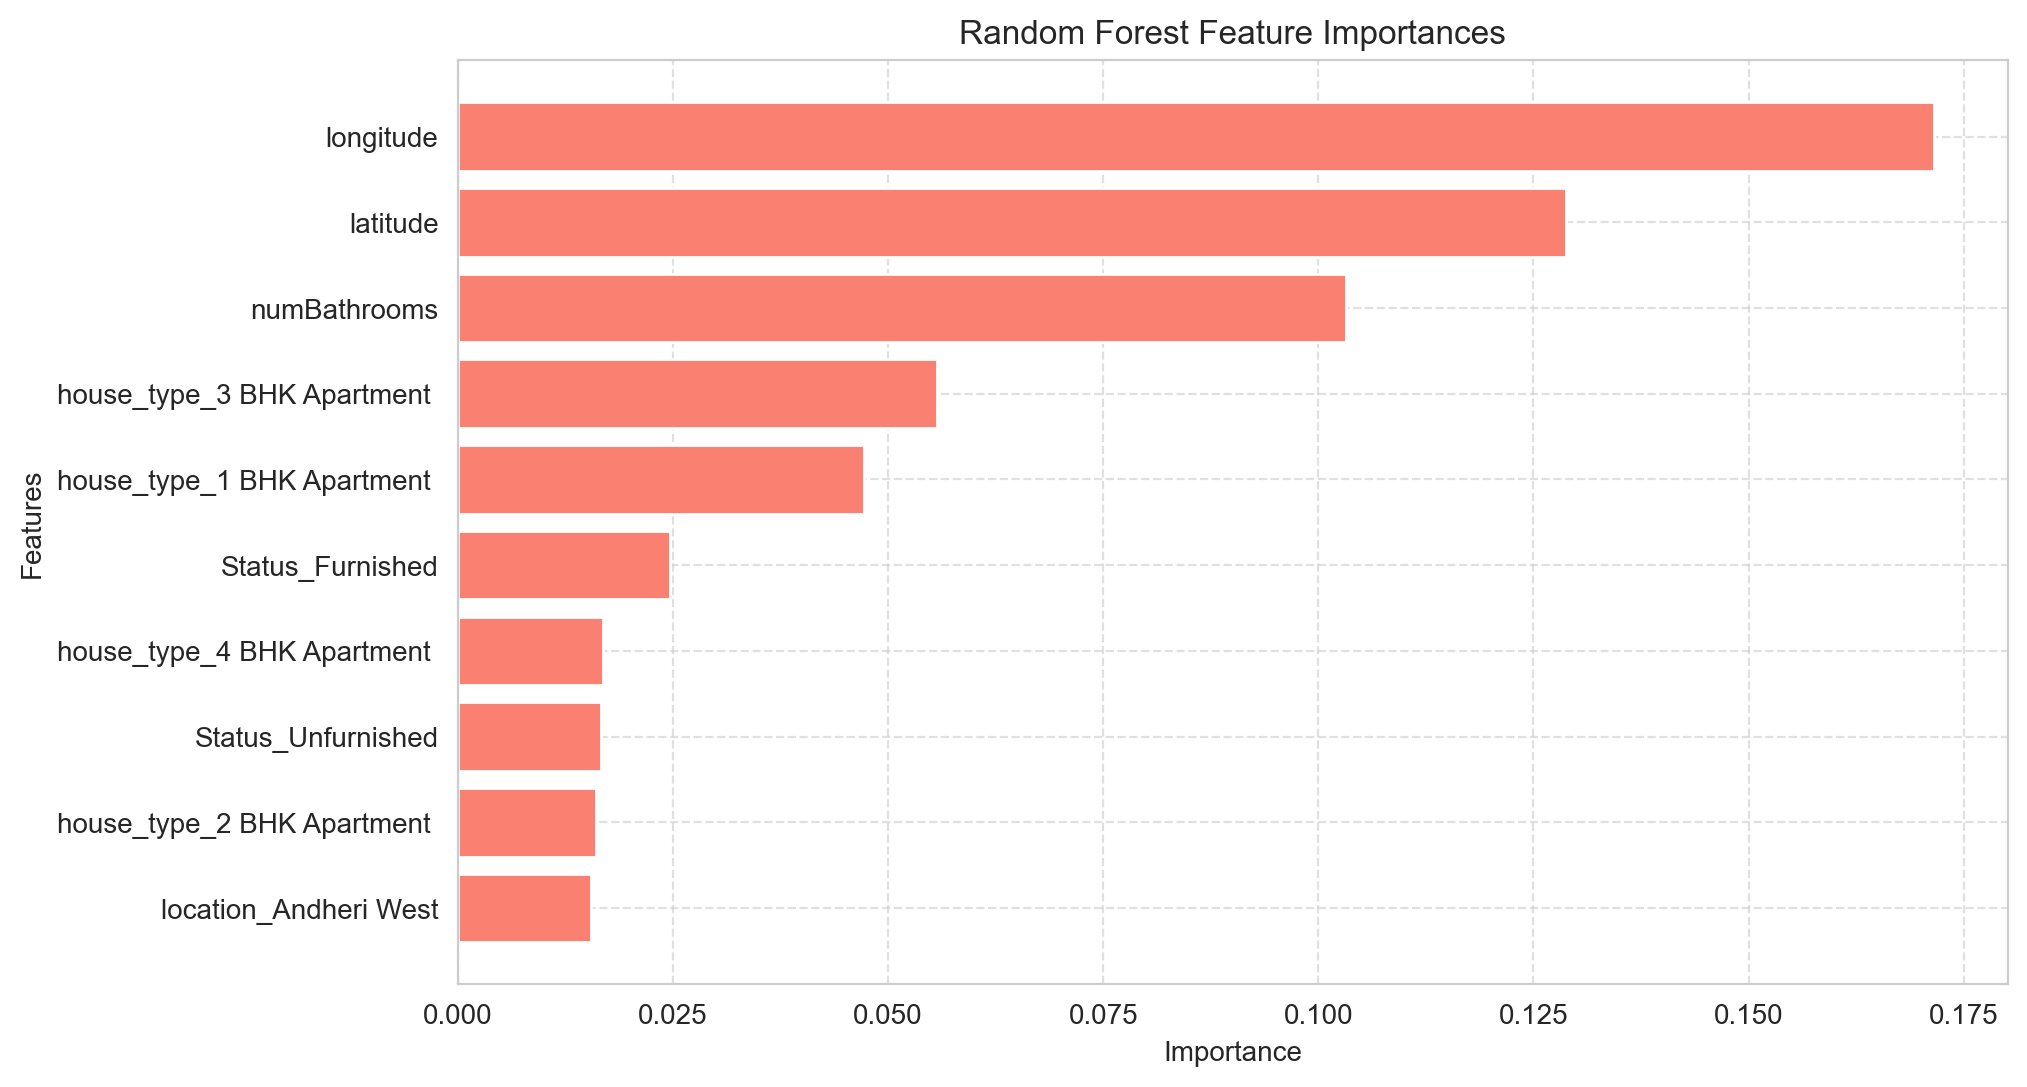

In [19]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(best, model, color='salmon')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [125]:
## Train - Test Split of Data

In [20]:
# Converting it into numpy array so it Sckit-Learn functions can be used
mumbai3 = mumbai2.values
target = target.values

In [21]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
mumtrain, mumtest, tartrain, tartest = train_test_split(
    mumbai3, target, 
    test_size=0.3, 
    random_state=999, 
    stratify=target
)

print(mumtrain.shape)
print(mumtest.shape)

(3500, 914)
(1500, 914)


## Model Evaluation Strategy
In this model evaluation, we utilized a stratified 5-fold cross-validation approach to ensure robust performance measurement of the K-Nearest Neighbors (KNN) classifier. The evaluation involved tuning the number of neighbors (n_neighbors) and the distance metric (p) using a pipeline that incorporated feature selection based on Random Forest Importance (RFI). 

## Linear Regression 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found: {'lr__fit_intercept': False, 'rfi_fs__n_features_': 20}
Best R2 score on training set: 0.4426252200736446
Performance on test set:
Mean Absolute Error (MAE): 0.2545703633423237
Mean Squared Error (MSE): 0.10929278330530307
R-squared (R2): 0.48152344776322564
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.161047      1.055559         0.000368        0.000454   
1       3.195066      0.440438         0.000399        0.000489   
2       4.842595      0.500645         0.016560        0.001876   
3       3.992069      0.256193         0.000400        0.000489   
4       3.866600      0.142234         0.000934        0.000828   

  param_lr__fit_intercept param_rfi_fs__n_features_  \
0                    True                        10   
1                    True                        20   
2                    True                       914   
3                   False          

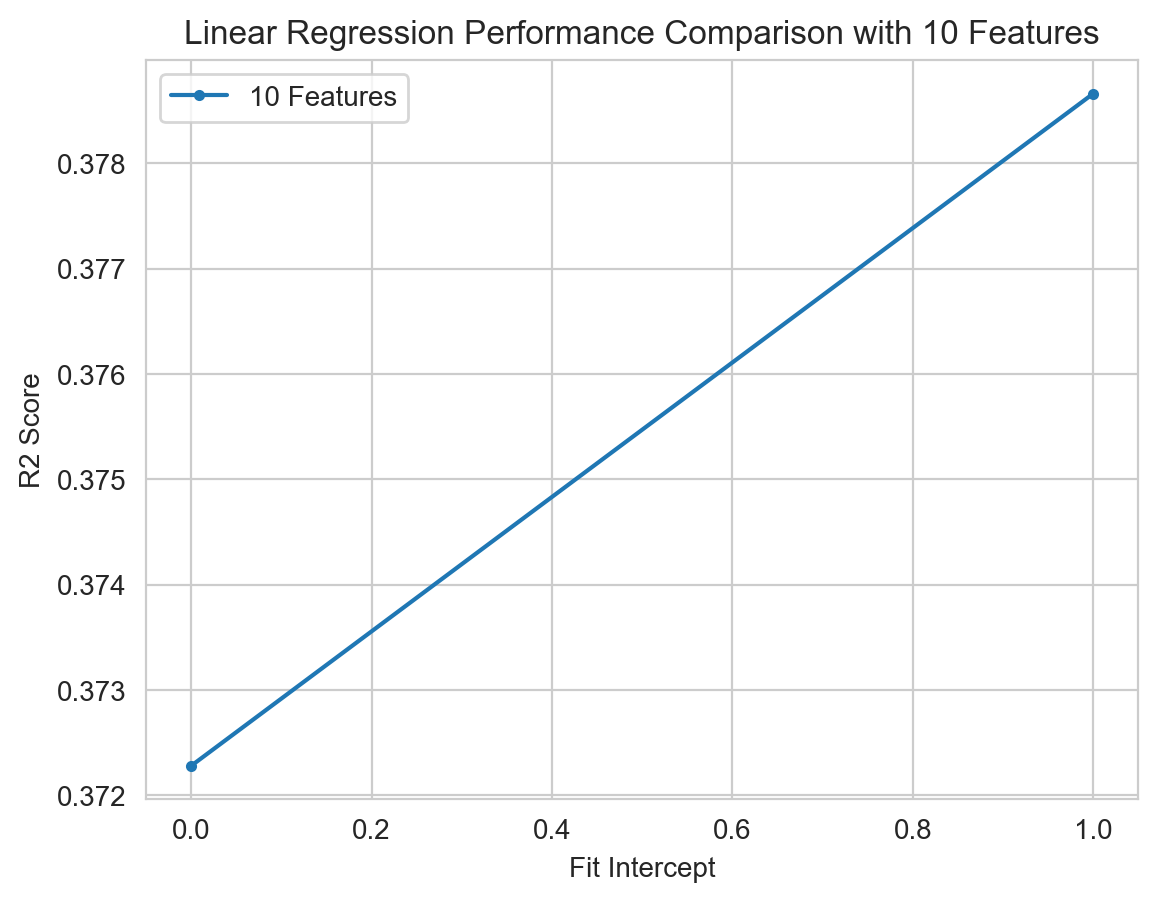

In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

# Custom function for RFI feature selection inside a pipeline
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    def fit(self, X, y):
        model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
        model_rfi.fit(X, y)
        self.fs_indices_ = np.argsort(model_rfi.feature_importances_)[::-1][:self.n_features_]
        return self

    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Split the data into training and testing sets
mumtrain, mumtest, tartrain, tartest = train_test_split(mumbai3, target, test_size=0.2, random_state=999, stratify=target)

# Using RobustScaler to transform the data
scaler = RobustScaler()
mumtrain_transformed = scaler.fit_transform(mumtrain)
mumtest_transformed = scaler.transform(mumtest)

# Setting up the pipeline with a feature selector and linear regression model
pipe_lr = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                    ('lr', LinearRegression())])

# Defining the hyperparameters we want to tune
params_pipe_lr = {'rfi_fs__n_features_': [10, 20, mumbai3.shape[1]],
                  'lr__fit_intercept': [True, False]}

# Performing grid search
gs_pipe_lr = GridSearchCV(estimator=pipe_lr, 
                          param_grid=params_pipe_lr, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='r2',
                          verbose=1)

# Fitting the model
gs_pipe_lr.fit(mumtrain_transformed, tartrain)

# Best parameters and score
best_params = gs_pipe_lr.best_params_
best_score = gs_pipe_lr.best_score_

print("Best parameters found:", best_params)
print("Best R2 score on training set:", best_score)

# Predictions on the test set
preds = gs_pipe_lr.predict(mumtest_transformed)

# Calculate performance metrics
mae = mean_absolute_error(tartest, preds)
mse = mean_squared_error(tartest, preds)
r2 = r2_score(tartest, preds)

print("Performance on test set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Extracting the search results
results_lr = gs_pipe_lr.cv_results_
results_lr_df = pd.DataFrame(results_lr)
print(results_lr_df.head())

# Plotting performance of the linear regression model
results_lr_10_features = results_lr_df[results_lr_df['param_rfi_fs__n_features_'] == 10.0]

plt.plot(results_lr_10_features['param_lr__fit_intercept'], results_lr_10_features['mean_test_score'], marker='.', label='10 Features')    
plt.xlabel('Fit Intercept')
plt.ylabel("R2 Score")
plt.title("Linear Regression Performance Comparison with 10 Features")
plt.legend()
plt.show()

## K-Nearest Neighbors (KNN)

 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'knn__n_neighbors': 15, 'knn__p': 2, 'rfi_fs__n_features_': 10}
Best score found:  0.9548494495167208
    mean_score  std_score  max_score  min_score  knn__n_neighbors  knn__p  \
21    0.954849   0.005955   0.964671   0.946273              15.0     2.0   
18    0.954814   0.005959   0.964507   0.946496              15.0     1.0   
12    0.953776   0.007488   0.965299   0.943520              10.0     1.0   
14    0.953374   0.007557   0.964685   0.941713              10.0     1.0   
27    0.952824   0.004194   0.958572   0.946685              20.0     2.0   

    rfi_fs__n_features_  
21                 10.0  
18                 10.0  
12                 10.0  
14                914.0  
27                 10.0  


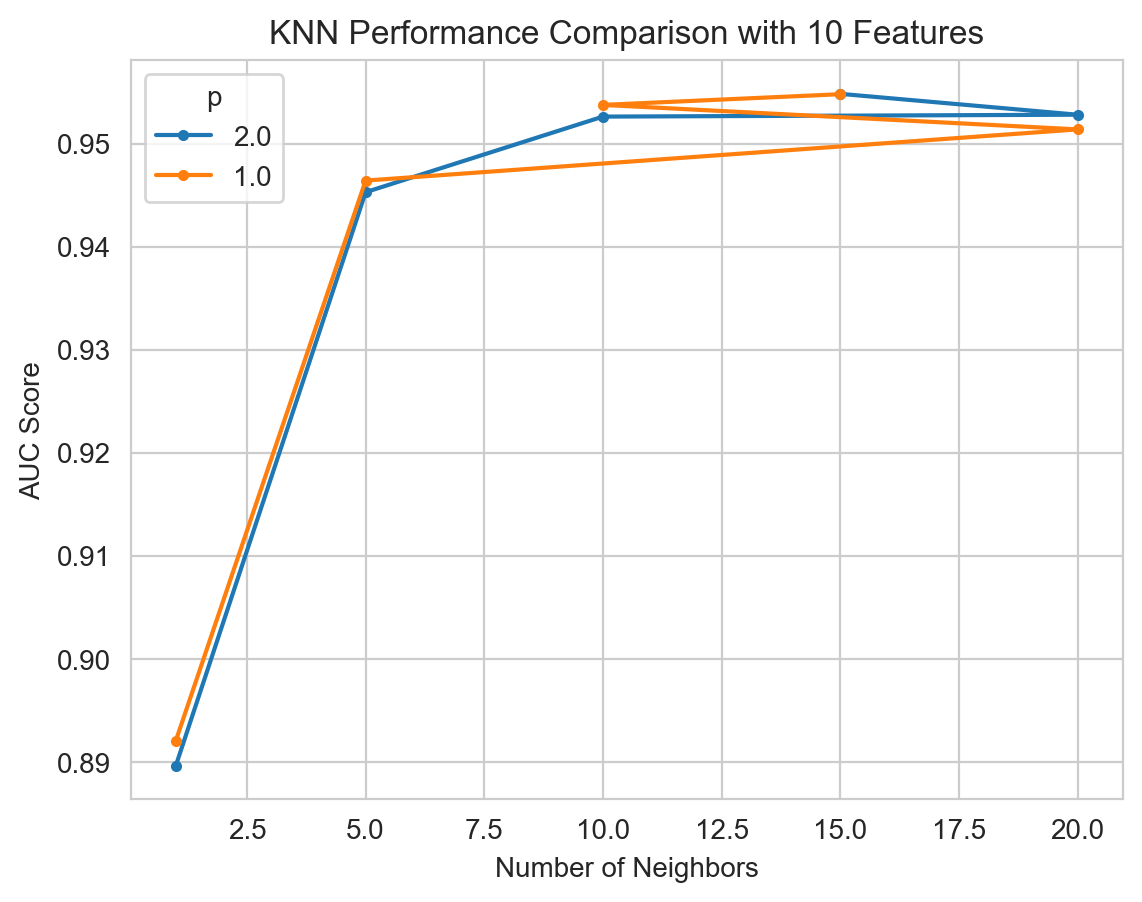

In [22]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Custom function for RFI feature selection inside a pipeline
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # Class constructor
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # Override the fit function
    def fit(self, X, y):
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = np.argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # Override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

# Define the KNN pipeline
pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

# Define the parameter grid for GridSearchCV
params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, mumtrain.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

# Initialize GridSearchCV
gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1,
                           error_score='raise') 

try:
    gs_pipe_KNN.fit(mumtrain, tartrain.ravel())
except Exception as e:
    print(f"An error occurred: {e}")

# Print the best parameters and best score if no error occurs
if gs_pipe_KNN.best_params_:
    print("Best parameters found: ", gs_pipe_KNN.best_params_)
    print("Best score found: ", gs_pipe_KNN.best_score_)

# Function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

# Get the search results
results_KNN = get_search_results(gs_pipe_KNN)
print(results_KNN.head())

# Visualize the results of the grid search corresponding to 10 selected features
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

for i in results_KNN_10_features['knn__p'].unique():
    temp = results_KNN_10_features[results_KNN_10_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison with 10 Features")
plt.show()

## Evaluation of Model on Test Data Set

 

In [23]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on the test set using the best estimator
best_knn = gs_pipe_KNN.best_estimator_
test_predictions = best_knn.predict_proba(mumtest)[:, 1]

# Calculate the AUC score on the test set
test_auc = roc_auc_score(tartest, test_predictions)
print(f"AUC score on the test set: {test_auc}")

AUC score on the test set: 0.9598165025564138


## Naive Bayes (NB)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'rfi_fs__n_features_': 914, 'nb__var_smoothing': 0.0069858797467852495}
Best ROC AUC score: 0.9394644834771588


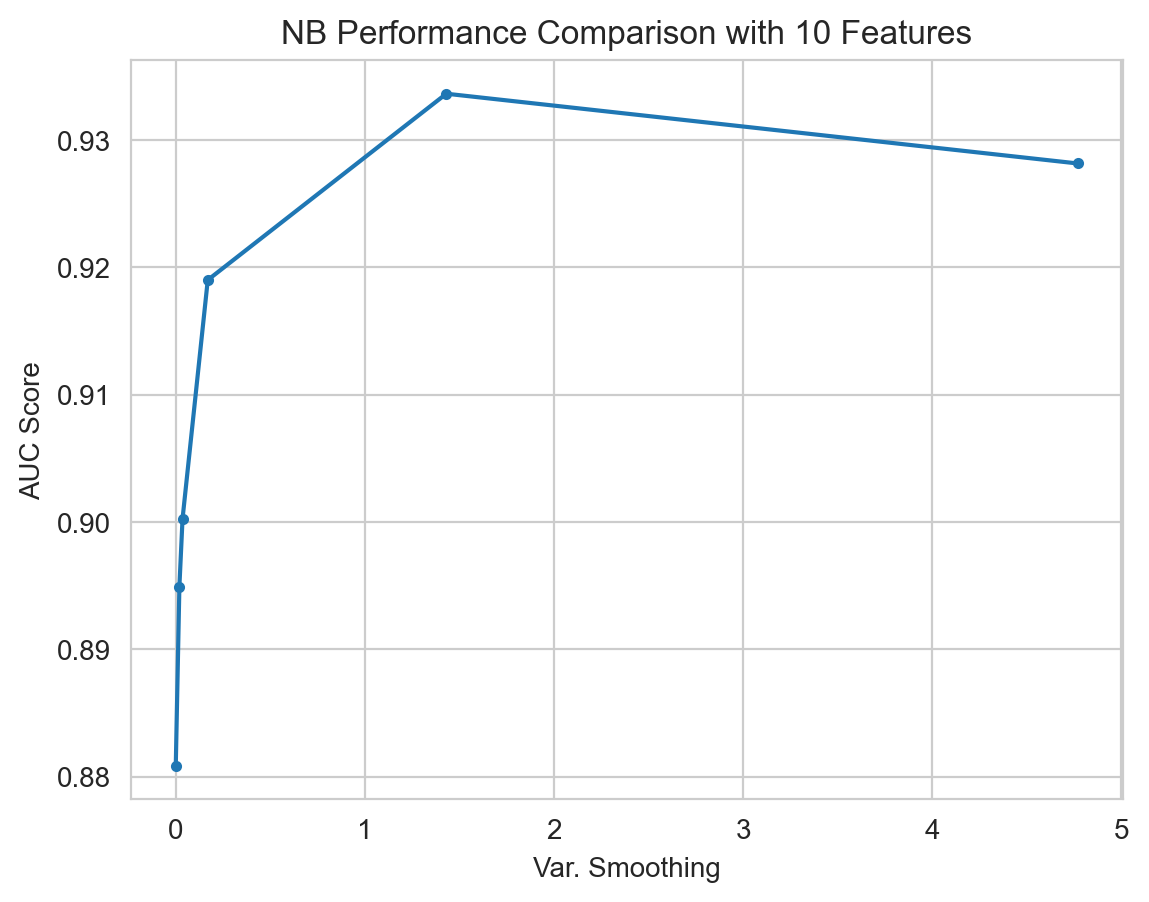

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline

# Assuming mumbai3 and target are already defined
mumtrain, mumtest, tartrain, tartest = train_test_split(
    mumbai3, target, 
    test_size=0.3, 
    random_state=999, 
    stratify=target
)



# Here we use RobustScaler to transform the data, as PowerTransformer was throwing an error
scaler = RobustScaler()
mumtrain_transformed = scaler.fit_transform(mumtrain)

pipe_nb = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                    ('nb', GaussianNB())])

params_pipe_nb = {'rfi_fs__n_features_': [10, 20, mumbai3.shape[1]],
                  'nb__var_smoothing': np.logspace(1, -3, num=200)}

n_iter_search = 20
gs_pipe_nb = RandomizedSearchCV(estimator=pipe_nb, 
                                param_distributions=params_pipe_nb, 
                                cv=cv_method,
                                refit=True,
                                n_jobs=-2,
                                scoring='roc_auc',
                                n_iter=n_iter_search,
                                verbose=1) 

gs_pipe_nb.fit(mumtrain_transformed, tartrain)
best_params = gs_pipe_nb.best_params_
best_score = gs_pipe_nb.best_score_

print("Best parameters found:", best_params)
print("Best ROC AUC score:", best_score)

# Extracting the search results
results_nb = gs_pipe_nb.cv_results_  #change this to get_search_results
results_nb_df = pd.DataFrame(results_nb)
results_nb_df.head()

results_nb_10_features = results_nb_df[results_nb_df['param_rfi_fs__n_features_'] == 10.0].sort_values('param_nb__var_smoothing')

plt.plot(results_nb_10_features['param_nb__var_smoothing'], results_nb_10_features['mean_test_score'], marker='.', label='10 Features')    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 10 Features")
plt.show()


## Decision Trees


 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'dt__max_depth': 5, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}
Best ROC AUC score: 0.9417698635077703


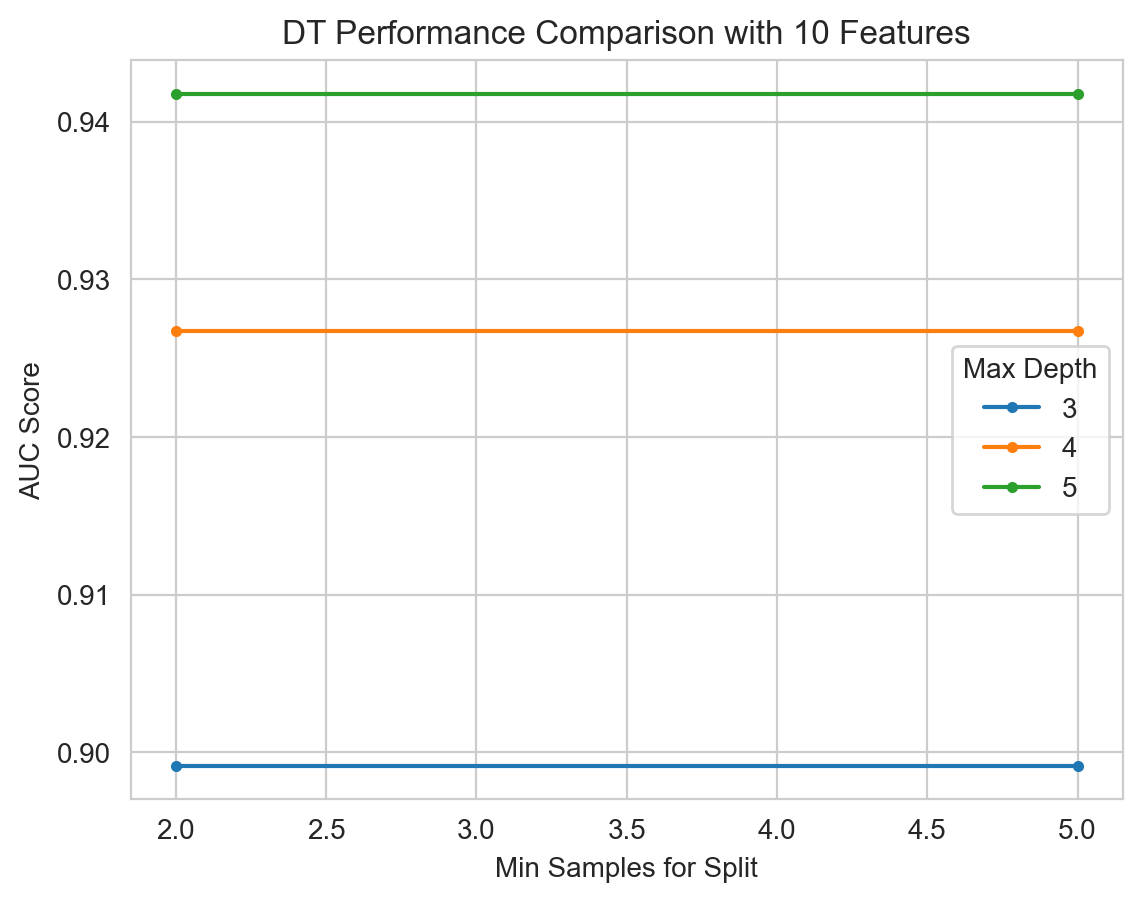

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline


pipe_dt = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_dt = {'rfi_fs__n_features_': [10, 20, mumbai3.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_dt = GridSearchCV(estimator=pipe_dt, 
                          param_grid=params_pipe_dt, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_dt.fit(mumtrain, tartrain)

best_params = gs_pipe_dt.best_params_
best_score = gs_pipe_dt.best_score_

print("Best parameters found:", best_params)
print("Best ROC AUC score:", best_score)

# Extracting the search results
results_dt = gs_pipe_dt.cv_results_  #change this to get_search_results
results_dt_df = pd.DataFrame(results_dt)
results_dt_df.head()

results_dt_10_features = results_dt_df[results_dt_df['param_rfi_fs__n_features_'] == 10.0]

for i in results_dt_10_features['param_dt__max_depth'].unique():
    temp = results_dt_10_features[results_dt_10_features['param_dt__max_depth'] == i]
    plt.plot(temp['param_dt__min_samples_split'], temp['mean_test_score'], marker='.', label=i)
    
plt.legend(title="Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 10 Features")
plt.show()


## Logistic Regression 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'lr__C': 10, 'lr__penalty': 'l2', 'rfi_fs__n_features_': 914}
Best score found:  0.9683795432329155
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_lr__C  \
0       3.509782      0.117240         0.009019        0.007392        0.01   
1       3.664884      0.228501         0.001183        0.001449        0.01   
2       3.262708      0.132741         0.022074        0.007478        0.01   
3       3.715675      0.474918         0.001396        0.001739        0.01   
4       4.611195      0.340588         0.004767        0.002073        0.01   

  param_lr__penalty param_rfi_fs__n_features_  \
0                l1                        10   
1                l1                        20   
2                l1                       914   
3                l2                        10   
4                l2                        20   

                                           

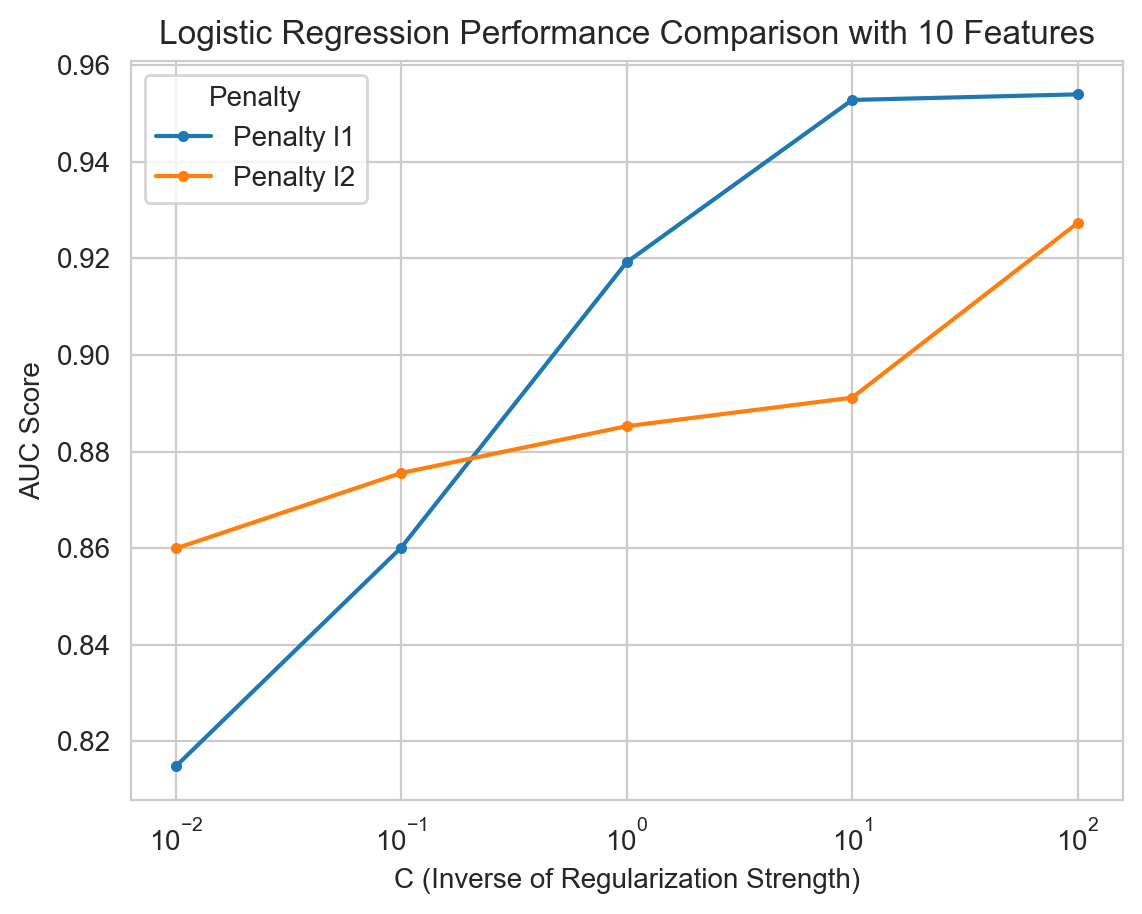

In [56]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Custom function for RFI feature selection inside a pipeline
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    def fit(self, X, y):
        model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
        model_rfi.fit(X, y)
        self.fs_indices_ = np.argsort(model_rfi.feature_importances_)[::-1][:self.n_features_]
        return self 

    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

# Define the Logistic Regression pipeline
pipe_LR = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                          ('lr', LogisticRegression(solver='liblinear', random_state=999))])

# Define the parameter grid for GridSearchCV
params_pipe_LR = {'rfi_fs__n_features_': [10, 20, mumtrain.shape[1]],
                  'lr__penalty': ['l1', 'l2'],
                  'lr__C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
gs_pipe_LR = GridSearchCV(estimator=pipe_LR, 
                          param_grid=params_pipe_LR, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1,
                          error_score='raise')

# Fit the model
try:
    gs_pipe_LR.fit(mumtrain, tartrain.ravel())
except Exception as e:
    print(f"An error occurred: {e}")

# Print the best parameters and best score if no error occurs
if hasattr(gs_pipe_LR, 'best_params_'):
    print("Best parameters found: ", gs_pipe_LR.best_params_)
    print("Best score found: ", gs_pipe_LR.best_score_)

# Extracting the search results
results_LR = gs_pipe_LR.cv_results_
results_LR_df = pd.DataFrame(results_LR)
print(results_LR_df.head())

# Visualize the results of the grid search corresponding to 10 selected features
results_LR_10_features = results_LR_df[results_LR_df['param_rfi_fs__n_features_'] == 10]

for penalty in results_LR_10_features['param_lr__penalty'].unique():
    temp = results_LR_10_features[results_LR_10_features['param_lr__penalty'] == penalty]
    plt.plot(temp['param_lr__C'], temp['mean_test_score'], marker='.', label=f"Penalty {penalty}")
    
plt.legend(title="Penalty")
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel("AUC Score")
plt.title("Logistic Regression Performance Comparison with 10 Features")
plt.xscale('log')
plt.show()


## Model Comparison 

In [69]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the cross-validation method
cv_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation for Linear Regression
scores_lr = cross_val_score(estimator=gs_pipe_lr.best_estimator_,
                            X=mumtest_transformed,
                            y=tartest, 
                            cv=cv_lr, 
                            n_jobs=-2,
                            scoring='roc_auc')

# Output the mean score
mean_score_lr = scores_lr.mean()

# Define the cross-validation method
cv_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation for K-Nearest Neighbors
scores_knn = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                             X=mumtest,
                             y=tartest, 
                             cv=cv_knn, 
                             n_jobs=-2,
                             scoring='roc_auc')

# Output the mean score
mean_score_knn = scores_knn.mean()


# Define the cross-validation method
cv_nb = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation for Naive Bayes
scores_nb = cross_val_score(estimator=gs_pipe_nb.best_estimator_,
                            X=mumtest_transformed,
                            y=tartest, 
                            cv=cv_nb, 
                            n_jobs=-2,
                            scoring='roc_auc')

# Output the mean score
mean_score_nb = scores_nb.mean()

# Define the cross-validation method
cv_dt = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation for Decision Trees
scores_dt = cross_val_score(estimator=gs_pipe_dt.best_estimator_,
                            X=mumtest,
                            y=tartest, 
                            cv=cv_dt, 
                            n_jobs=-2,
                            scoring='roc_auc')

# Output the mean score
mean_score_dt = scores_dt.mean()

# Define the cross-validation method
cv_logreg = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

# Perform cross-validation for Logistic Regression
scores_logreg = cross_val_score(estimator=gs_pipe_LR.best_estimator_,
                                X=mumtest,
                                y=tartest, 
                                cv=cv_logreg, 
                                n_jobs=-2,
                                scoring='roc_auc')

# Output the mean score
mean_score_logreg = scores_logreg.mean()

In [70]:

print("Mean ROC AUC Scores\n")
print(f"Linear Regression: {mean_score_lr:.4f}")
print(f"K-Nearest Neighbors: {mean_score_knn:.4f}")
print(f"Naive Bayes: {mean_score_nb:.4f}")
print(f"Decision Trees: {mean_score_dt:.4f}")
print(f"Logistic Regression: {mean_score_logreg:.4f}")

Mean ROC AUC Scores

Linear Regression: 0.9187
K-Nearest Neighbors: 0.9325
Naive Bayes: 0.9441
Decision Trees: 0.9136
Logistic Regression: 0.9571


## Paired t-tests

## Peformance Analysis

In [80]:

# Linear Regression predictions
preds_lr = gs_pipe_lr.predict(mumtest_transformed)
if preds_lr.dtype == np.float64:
    preds_lr = (preds_lr >= 0.5).astype(int) 

# K-Nearest Neighbors predictions
preds_knn = gs_pipe_KNN.predict(mumtest)

# Naive Bayes predictions
preds_nb = gs_pipe_nb.predict(mumtest_transformed)

# Decision Trees predictions
preds_dt = gs_pipe_dt.predict(mumtest)

# Logistic Regression predictions 
preds_logreg_proba = gs_pipe_LR.predict_proba(mumtest)[:, 1]
preds_logreg = (preds_logreg_proba >= 0.5).astype(int)

- Logistic Regression & Linear Regression predictions were converted to binary lables to do the performance test 

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# True labels
y_true = tartest

# List of model names and predictions
models = ["Linear Regression", "K-Nearest Neighbors", "Naive Bayes", "Decision Trees", "Logistic Regression"]
predictions = [preds_lr, preds_knn, preds_nb, preds_dt, preds_logreg]

# Loop through each model and its predictions to compute and print metrics
for model_name, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")




Metrics for Linear Regression:
Accuracy: 0.8570
Precision: 0.8046
Recall: 0.6954
F1 Score: 0.7460

Metrics for K-Nearest Neighbors:
Accuracy: 0.8880
Precision: 0.8188
Recall: 0.8079
F1 Score: 0.8133

Metrics for Naive Bayes:
Accuracy: 0.7980
Precision: 0.6025
Recall: 0.9735
F1 Score: 0.7443

Metrics for Decision Trees:
Accuracy: 0.8930
Precision: 0.7826
Recall: 0.8940
F1 Score: 0.8346

Metrics for Logistic Regression:
Accuracy: 0.9140
Precision: 0.8418
Recall: 0.8808
F1 Score: 0.8608
